# ML LAB 07 - LOGISTIC REGRESSION
### Name : Tulasi Raman R
### Register Number : 21MIS1170

# Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
df = pd.read_csv('Student-Pass-Fail-Data.csv')
df.head()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [42]:
df.describe()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  1000 non-null   int64
 1   Tution_Monthly    1000 non-null   int64
 2   Pass_Or_Fail      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


# Data Visualization

<Axes: xlabel='Pass_Or_Fail', ylabel='count'>

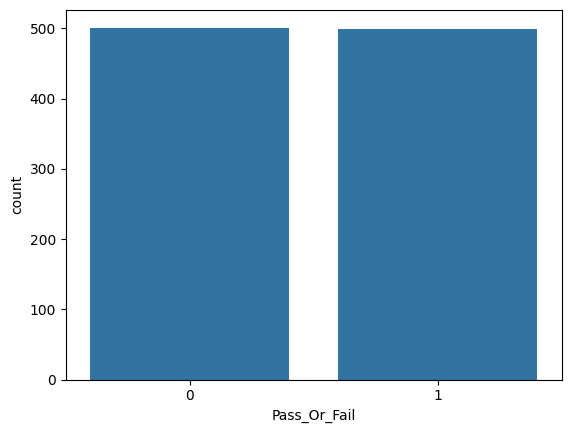

In [44]:
sns.countplot(x='Pass_Or_Fail', data=df)

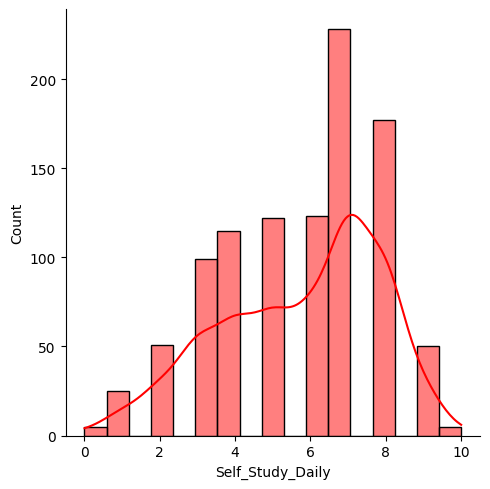

In [45]:
sns.displot(x='Self_Study_Daily', data=df, color='red', kde=True)

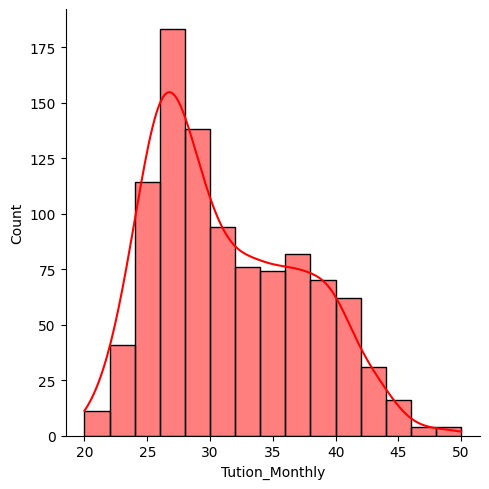

In [46]:
sns.displot(x='Tution_Monthly', data=df, color='red', kde=True)

# Splitting the data into independent(X) and dependent(y) variables

In [47]:
X = df.iloc[:,[0,1]]
X.head()

,Self_Study_Daily,Tution_Monthly
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42


In [48]:
y = df.iloc[:, 2]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Pass_Or_Fail, dtype: int64

# Feature scaling

In [49]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.59244861, -0.70814346],
       [-1.76602516,  1.97041337],
       [ 0.59244861, -0.87555326],
       ...,
       [-1.29433041,  1.30077416],
       [ 0.59244861, -1.04296307],
       [-0.3509409 ,  0.96595456]])

# Splitting the dataset into train and test sets

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)


# Fitting the logistic regression model and predicting test results

In [51]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
507,0,1
818,1,1
452,0,0
368,1,1
242,1,1
...,...,...
459,0,0
415,1,1
61,1,1
347,0,0


# Coefficient and Intercept

In [54]:
classifier.coef_

array([[ 3.82639026, -3.54178377]])

In [55]:
classifier.intercept_ 

array([-2.68767548])

# Evaluating the model

In [56]:
print(classifier.predict_proba(X))

[[1.10331924e-01 8.89668076e-01]
 [9.99999926e-01 7.36490110e-08]
 [6.41467981e-02 9.35853202e-01]
 ...
 [9.99995202e-01 4.79779388e-06]
 [3.65016338e-02 9.63498366e-01]
 [9.99419891e-01 5.80108870e-04]]


In [57]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[139,  14],
       [  0, 147]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

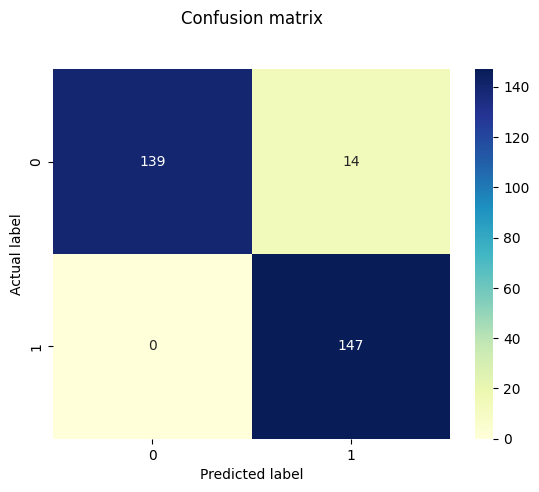

In [58]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [59]:
accuracy_score(y_test,y_pred)

0.9533333333333334

# Classification Report

In [60]:
target_names = ['Fail', 'Pass']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Fail       1.00      0.91      0.95       153
        Pass       0.91      1.00      0.95       147

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



# Model Interpretation
## Why logistic regression?
- Here we have a large dataset of where the predictor variables and the log-odds of the response variable are in linear relationship.
- Dependant variable is a binary datatype and independant variables have very little or no multicollinearity.

# Model Observation:
- Coefficient i.e, the Slope of the line is [ 3.82639026, -3.54178377 ], which means the change of "Self_Study_Daily" for a unit, X increases and the change of "Tution_Monthly" for a unit, X decreases.
- The intercept represents the value of the dependent variable when all independent variables are zero. For logistic regression model here, the intercept of -2.68767548 would represent the estimated pass percentage for students with zero years of experience will result in fail.
- From the classification report we can see that the precision and recall for class "Fail" is 1.00 and 0.91 respectively meaning that the 100% of the predictions made by the model is correct and 91% of the relevant data points were correctly identified. Similary for class "Pass" precision is 91% and recall is 100%. Means the preprocessed dataset is well trained and processed such that it yeilds about 95% precise outcome.
- And as for the accuracy of the model it is 0.95 i.e., 95% of outcomes were predicted correct.